In [2]:
import google.colab as uploded
uploaded = uploded.files.upload()

Saving youtube_2025_dataset_202504061614.csv to youtube_2025_dataset_202504061614.csv


In [4]:
import pandas as pd

def load_data(filepath):
    """
    Load dataset from the given CSV file path.
    """
    return pd.read_csv(filepath)

def preprocess_data(df):
    """
    Preprocess the dataset:
    - Drop irrelevant/non-numeric columns
    - Convert categorical variables using one-hot encoding
    - Handle missing values
    """
    df = df.copy()

    # Drop non-numeric or irrelevant columns
    columns_to_drop = [
        'Channel Name',
        'Youtuber Name',
        'Best Video',
        'Neural Interface Compatible',
        'Holographic Content Rating'
    ]
    df = df.drop(columns=columns_to_drop, errors='ignore')

    # Convert categorical column to dummy variables
    df = pd.get_dummies(df, columns=['Metaverse Integration Level'], drop_first=True)

    # Drop rows with missing values (or you can fill them)
    df = df.dropna()

    return df

def main():
    file_path = "youtube_2025_dataset_202504061614.csv"
    df = load_data(file_path)

    print("\n--- Original Dataset ---")
    print(df.head())

    clean_df = preprocess_data(df)

    print("\n--- Preprocessed Dataset ---")
    print(clean_df.head())

if __name__ == "__main__":
    main()



--- Original Dataset ---
                  Channel Name       Youtuber Name  Total Videos  \
0              Smith-Ross Labs          Eric Patel            68   
1             Sandoval PLC Hub  Cynthia Harrington           128   
2  Jones, Moore and Ho Network       Amanda Walker           282   
3         Mitchell-Hooper Labs   Jessica Nelson MD           302   
4           Wilson LLC Studios     Matthew Sherman           129   

                           Best Video  Avg Video Length (min)  \
0           VR Challenge: Review 2023                    24.8   
1  Nanotech Simulation: Analysis 2024                    22.9   
2  Metaverse Interface: Analysis 2024                    24.0   
3            VR Protocol: Review 2023                    24.6   
4    Nanotech Simulation: Review 2024                    24.6   

   Total Subscribers  Members Count  AI Generated Content (%)  \
0            8264152         303319                         9   
1            8768222         384629         

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

def load_and_preprocess(filepath):
    """
    Loads and preprocesses the dataset:
    - Drops irrelevant columns
    - Encodes categorical variables
    - Removes missing values
    """
    df = pd.read_csv(filepath)

    # Drop unnecessary columns
    columns_to_drop = [
        'Channel Name',
        'Youtuber Name',
        'Best Video',
        'Neural Interface Compatible',
        'Holographic Content Rating'
    ]
    df = df.drop(columns=columns_to_drop, errors='ignore')

    # One-hot encode the 'Metaverse Integration Level'
    df = pd.get_dummies(df, columns=['Metaverse Integration Level'], drop_first=True)

    # Drop missing values
    df = df.dropna()

    return df

def train_regression_model(X_train, y_train):
    """
    Trains a Random Forest Regressor.
    """
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)
    return model

def evaluate_model(model, X_test, y_test):
    """
    Evaluates the trained model and prints RMSE and R².
    """
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print("\n--- Model Evaluation ---")
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.2f}")

def main():
    file_path = "youtube_2025_dataset_202504061614.csv"
    df = load_and_preprocess(file_path)

    # Feature matrix and target
    X = df.drop(columns=['Engagement Score'])
    y = df['Engagement Score']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Train model
    model = train_regression_model(X_train, y_train)

    # Evaluate model
    evaluate_model(model, X_test, y_test)

if __name__ == "__main__":
    main()



--- Model Evaluation ---
RMSE: 35.59
R² Score: 1.00


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split

def load_and_preprocess(filepath):
    """
    Loads and preprocesses the dataset.
    """
    df = pd.read_csv(filepath)

    # Drop irrelevant columns
    columns_to_drop = [
        'Channel Name',
        'Youtuber Name',
        'Best Video',
        'Neural Interface Compatible',
        'Holographic Content Rating'
    ]
    df = df.drop(columns=columns_to_drop, errors='ignore')

    # Convert categorical to dummy variables
    df = pd.get_dummies(df, columns=['Metaverse Integration Level'], drop_first=True)

    # Drop missing values
    df = df.dropna()

    return df

def split_data(df):
    """
    Splits data into training and testing sets.
    """
    X = df.drop(columns=['Engagement Score'])
    y = df['Engagement Score']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    print("\n--- Data Split Info ---")
    print(f"Training set size: {X_train.shape[0]} rows")
    print(f"Testing set size: {X_test.shape[0]} rows")

    return X_train, X_test, y_train, y_test

def main():
    file_path = "youtube_2025_dataset_202504061614.csv"
    df = load_and_preprocess(file_path)

    X_train, X_test, y_train, y_test = split_data(df)

if __name__ == "__main__":
    main()



--- Data Split Info ---
Training set size: 4000 rows
Testing set size: 1000 rows


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

def load_and_preprocess(filepath):
    """
    Loads and preprocesses the dataset.
    """
    df = pd.read_csv(filepath)

    # Drop unnecessary columns
    columns_to_drop = [
        'Channel Name',
        'Youtuber Name',
        'Best Video',
        'Neural Interface Compatible',
        'Holographic Content Rating'
    ]
    df = df.drop(columns=columns_to_drop, errors='ignore')

    # Convert categorical column to dummy variables
    df = pd.get_dummies(df, columns=['Metaverse Integration Level'], drop_first=True)

    df = df.dropna()
    return df

def evaluate_model(y_true, y_pred):
    """
    Calculates and prints RMSE and R² score.
    """
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    print("\n--- Model Evaluation ---")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R² Score: {r2:.2f}")

def main():
    file_path = "youtube_2025_dataset_202504061614.csv"
    df = load_and_preprocess(file_path)

    # Split data
    X = df.drop(columns=['Engagement Score'])
    y = df['Engagement Score']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train model
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Evaluate model
    evaluate_model(y_test, y_pred)

if __name__ == "__main__":
    main()



--- Model Evaluation ---
Root Mean Squared Error (RMSE): 35.59
R² Score: 1.00



--- Model Evaluation ---
RMSE: 35.59
R² Score: 1.00
Do you want to see the plot? (y/n): y


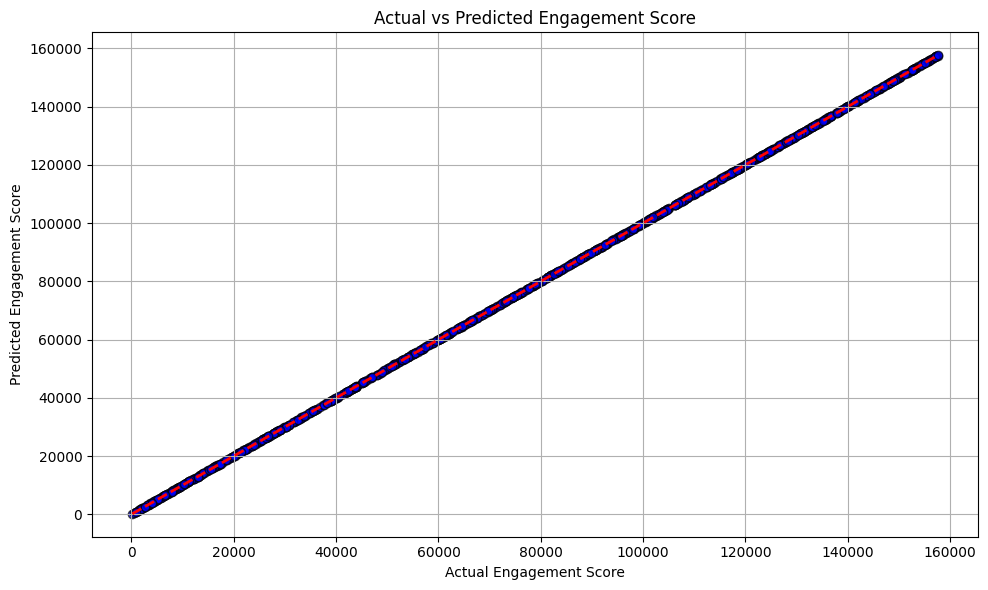

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

def load_and_preprocess(filepath):
    """
    Loads and preprocesses the dataset.
    """
    df = pd.read_csv(filepath)

    # Drop irrelevant columns
    columns_to_drop = [
        'Channel Name', 'Youtuber Name', 'Best Video',
        'Neural Interface Compatible', 'Holographic Content Rating'
    ]
    df = df.drop(columns=columns_to_drop, errors='ignore')

    # Convert categorical column to numeric (one-hot encoding)
    df = pd.get_dummies(df, columns=['Metaverse Integration Level'], drop_first=True)

    df = df.dropna()
    return df

def plot_actual_vs_predicted(y_test, y_pred):
    """
    Plot actual vs predicted values using scatter plot.
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.7, color='blue', edgecolor='k')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel("Actual Engagement Score")
    plt.ylabel("Predicted Engagement Score")
    plt.title("Actual vs Predicted Engagement Score")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def main():
    file_path = "youtube_2025_dataset_202504061614.csv"
    df = load_and_preprocess(file_path)

    # Train-test split
    X = df.drop(columns=['Engagement Score'])
    y = df['Engagement Score']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train model
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Evaluate
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print("\n--- Model Evaluation ---")
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.2f}")

    # Ask user if they want visualization
    choice = input("Do you want to see the plot? (y/n): ").lower()
    if choice == 'y':
        plot_actual_vs_predicted(y_test, y_pred)

if __name__ == "__main__":
    main()
